# ВРЕМЯ И СВОДНЫЕ ТАБЛИЦЫ 

Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:

**InvoiceNo** — номер транзакции   
**StockCode** — код товара  
**Description** — описание товара  
**Quantity** — количество единиц товара, добавленных в заказ  
**InvoiceDate** — дата транзакции   
**UnitPrice** — цена за единицу товара  
**CustomerID** — id клиента  
**Country** — страна, где проживает клиент  

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
retail = pd.read_csv('5_data.csv.zip', encoding='ISO-8859-1', compression='zip')
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


1) Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из *retail*.

In [10]:
retail.shape[0] - retail.drop_duplicates().shape[0]

0

In [122]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Revenue        float64
dtype: object

In [4]:
retail = retail.drop_duplicates()

2) Данные содержат в себе записи как об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (*InvoiceNo*) ставится *C* (canceled). 

Сколько всего транзакций отменили пользователи? Каждый отдельный тип продукта считайте за отдельную транзакцию - уникальные номера считать не надо.

In [16]:
retail[retail['InvoiceNo'].str.startswith('C')]['InvoiceNo'].count()

9251

3) Теперь отфильтруйте данные и оставьте в *retail* только те заказы, где *Quantity* > 0. В качестве ответа укажите число оставшихся строк.

In [19]:
retail.query('Quantity > 0').shape[0]

526054

4) Посчитайте число заказов для каждого пользователя (*CustomerID*) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (*InvoiceNo*), где N – 80% процентиль. Запишите полученные *id* пользователей в *germany_top* (не весь датафрейм, только id).

In [5]:
germany_top = retail[retail['Country'] == 'Germany'] \
    .groupby('CustomerID') \
    .agg({'InvoiceNo' : 'nunique'}) \
    .query('InvoiceNo > InvoiceNo.quantile(q=0.8)') \
    .index

germany_top

Float64Index([12471.0, 12472.0, 12474.0, 12476.0, 12481.0, 12500.0, 12569.0,
              12600.0, 12619.0, 12621.0, 12626.0, 12647.0, 12662.0, 12705.0,
              12708.0, 12709.0, 12712.0, 12720.0],
             dtype='float64', name='CustomerID')

In [11]:
retail.quantile(q=0.8)

Quantity         12.00
UnitPrice         4.95
CustomerID    17091.00
Name: 0.8, dtype: float64

5) Используя объект с *id* пользователей (*germany_top*), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в *top_retail_germany*. 

In [11]:
top_retail_germany =  retail[retail['CustomerID'].isin(germany_top)]
top_retail_germany

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541726,581570,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,12/9/2011 11:59,4.95,12662.0,Germany
541727,581570,23077,DOUGHNUT LIP GLOSS,20,12/9/2011 11:59,1.25,12662.0,Germany
541728,581570,20750,RED RETROSPOT MINI CASES,2,12/9/2011 11:59,7.95,12662.0,Germany
541729,581570,22505,MEMO BOARD COTTAGE DESIGN,4,12/9/2011 11:59,4.95,12662.0,Germany


6) Сгруппируйте *top_retail_germany* по коду товара (*StockCode*). Какой из продуктов добавляли в корзину чаще всего, кроме POST? 

Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета *Quantity*.

In [7]:
top_retail_germany.groupby('StockCode').agg({'InvoiceNo' : 'count'}).nlargest(2, 'InvoiceNo')

,InvoiceNo
StockCode,
POST,219
22326,62


In [10]:
top_retail_germany.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

7) Вернемся к анализу полного датасета *retail*. Создайте колонку *Revenue* с суммой покупки, используя колонки *Quantity* и *UnitPrice*

In [68]:
retail = retail.assign(Revenue = retail.UnitPrice * retail.Quantity)

8) Для каждой транзакции (*InvoiceNo*), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (*InvoiceNo*) по сумме заказа (через запятую с пробелом и в порядке убывания *TotalRevenue*)

In [73]:
retail.groupby('InvoiceNo') \
    .agg({'Revenue' : 'sum'}) \
    .nlargest(5, 'Revenue') \
    .index

Index(['581483', '541431', '574941', '576365', '556444'], dtype='object', name='InvoiceNo')

## Минипроект

#### Описание данных  
Имеются следующие данные:

**date** – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)  
**name** – имя пользователя  
**transaction** – статус транзакции  
**minute** – сколько минут прошло с начала дня  


In [75]:
transaction = pd.read_csv('transaction_data.csv')
transaction

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


1) Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [77]:
transaction.dtypes

date           object
name           object
transaction    object
dtype: object

In [78]:
transaction.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [79]:
transaction.isna().sum()

date           0
name           0
transaction    0
dtype: int64

2) Проверьте, какие значения принимает колонка *transaction* . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.


<AxesSubplot:xlabel='transaction', ylabel='count'>

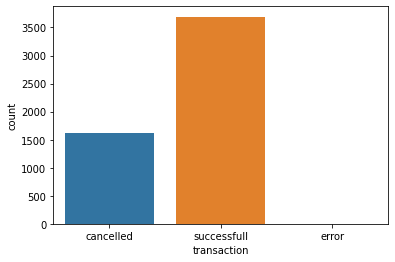

In [121]:
sns.countplot(x='transaction', data=transaction )

3) Сколько произошло ошибок? 

In [87]:
transaction.query('transaction == "error"').shape[0]

4

4) Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением *successfull*

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси **x** – число транзакций  
по оси **y** – доля пользователей с таким числом транзакций  


In [90]:
user_transaction = transaction.query('transaction == "successfull"').groupby('name').agg({'date' : 'count'})

<AxesSubplot:xlabel='date', ylabel='Density'>

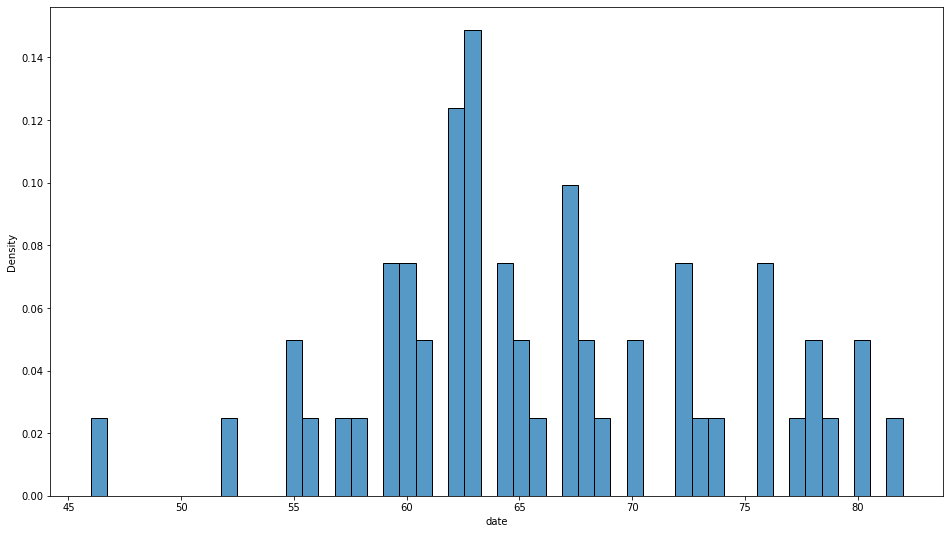

In [100]:
plt.figure(figsize=(16, 9))
sns.histplot(x=user_transaction.date, stat='density', bins=50)

In [102]:
user_transaction.describe().round()

,date
count,56.0
mean,66.0
std,8.0
min,46.0
25%,61.0
50%,64.0
75%,72.0
max,82.0


5) К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу *user_vs_minute_pivot*, где:

столбцы – имена пользователей  
строки – минута времени осуществления операции (minute)  
значения – число совершённых операций  

Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [104]:
update_transaction = pd.read_csv('transaction_data_updated.csv')
update_transaction

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [112]:
user_vs_minute_pivot = update_transaction.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction' : 'count'}) \
    .pivot(index='minute', columns='name', values='transaction').fillna(0).reset_index()
user_vs_minute_pivot.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


6) Исправьте ошибку коллеги, и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку *true_minute*

In [116]:
update_transaction.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [117]:
update_transaction['date'] = pd.to_datetime(update_transaction['date'])

In [119]:
update_transaction = update_transaction.assign(
    true_minute = update_transaction.date.dt.hour.mul(60) + update_transaction.date.dt.minute
)

## Дополнительный проект

В папке subsid (shared/homeworks/python_ds_miniprojects/5_subsid) находятся файлы (tm_sales_1, tm_sales_2, ...) с продажами продуктов через телемаркетинг. Каждый файл содержит, как минимум, 4 колонки (поля): *FILIAL_ID*, *SUBS_ID*, *PROD_ID*, *ACT_DTTM*.

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, соединив файлы о продажах с логами по подключениям в системе.

Особенности данных:

- сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале *SUBS_ID*, то нужно его добавить
- поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
- продажа не засчитывается, если отключение (*END_DTTM*) произошло меньше чем через 5 минут после подключения (*START_DTTM*)
- если в файле с продажами встречается строка без указанного *SUBS_ID*, она пропускается

Сохраните результат в датафрэйм с разделителем *;*, содержащий корректные подключения.

In [18]:
files = os.listdir('subsid')

In [23]:
#считываем 3 сsv и объединяем в 1
arr = []
for i in files[:3]:
    arr.append(pd.read_csv(f'subsid\\{i}', sep=';'))
subset = pd.concat(arr[:]).reset_index(drop=True)
subset

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
3,id5416547,3,1743,17-03-2020 10:17
4,NaN,4,7421,12-03-2020 11:25
5,8362218,7,9879,05-03-2020 11:42
6,2185490,2,3210,16-03-2020 16:28
7,id5764122,3,1499,18-03-2020 15:44
8,id7642700,6,3020,15-03-2020 14:21
9,id1374509,2,5677,17-03-2020 11:48


In [24]:
#удаляем пропуски в SUBS_ID
subset.dropna(subset='SUBS_ID', inplace=True)

In [25]:
#добавляем id там, где его нет
subset.SUBS_ID = subset.SUBS_ID.apply(lambda c: f'id{c}' if not str(c).startswith('id') else c)
subset

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
3,id5416547,3,1743,17-03-2020 10:17
5,id8362218,7,9879,05-03-2020 11:42
6,id2185490,2,3210,16-03-2020 16:28
7,id5764122,3,1499,18-03-2020 15:44
8,id7642700,6,3020,15-03-2020 14:21
9,id1374509,2,5677,17-03-2020 11:48


In [234]:
#прочитаем файл с активациями
activations = pd.read_csv('subsid\\zprod_activations_logs.csv', sep=';')
activations

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43
3,id8641743,2752,20-03-2020 15:44,21-04-2020 15:44
2,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00
6,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42
2,id8741631,5677,19-03-2020 12:28,01-12-2020 00:00


In [246]:
#объединим таблицы
subset_activ = subset.merge(activations, on=['SUBS_ID', 'PROD_ID'], how='inner')
subset_activ

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM
0,id4651830,1,1954,20-03-2020 14:59,20-03-2020 14:59,01-12-2020 00:00
1,id7646509,5,6431,19-03-2020 13:00,19-03-2020 13:00,19-03-2020 13:03
2,id5416547,3,1743,17-03-2020 10:17,17-03-2020 10:17,25-03-2020 11:00
3,id2185490,2,3210,16-03-2020 16:28,16-03-2020 16:28,01-12-2020 00:00
4,id7642700,6,3020,15-03-2020 14:21,15-03-2020 14:21,15-03-2020 23:42


In [248]:
subset_activ.dtypes

SUBS_ID       object
FILIAL_ID      int64
PROD_ID        int64
ACT_DTTM      object
START_DTTM    object
END_DTTM      object
dtype: object

In [249]:
#переведем к dt 
for i in ['START_DTTM', 'END_DTTM']:
    subset_activ[i] = pd.to_datetime(subset_activ[i], dayfirst=True)

In [251]:
#создадим еще один столбец с количеством минут между START_DTTM и END_DTTM
subset_activ = subset_activ.assign(
    DIFF = (subset_activ.END_DTTM - subset_activ.START_DTTM) \
            .dt.total_seconds().div(60)
)

In [258]:
#отберем записи, где больше 5 минут
new_subset_activ.query('DIFF >= 5')

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,DIFF
0,id4651830,1,1954,20-03-2020 14:59,2020-03-20 14:59:00,2020-12-01 00:00:00,367741.0
2,id5416547,3,1743,17-03-2020 10:17,2020-03-17 10:17:00,2020-03-25 11:00:00,11563.0
3,id2185490,2,3210,16-03-2020 16:28,2020-03-16 16:28:00,2020-12-01 00:00:00,373412.0
4,id7642700,6,3020,15-03-2020 14:21,2020-03-15 14:21:00,2020-03-15 23:42:00,561.0


In [12]:
new_subset_activ.to_csv('subset_activ.csv', sep=';')

NameError: name 'new_subset_activ' is not defined

In [17]:
s = 'dde, dlepl,   efkem, cfe'
[i.strip() for i in s.split(', ')]

['dde', 'dlepl', 'efkem', 'cfe']

In [ ]:
!